In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import random
import numpy as np
import matplotlib.pyplot as plt
import ssl

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(f"Shape of x_train: {X_train.shape}")
print(f"Shape of y_train: {Y_train.shape}")
print()
print(f"Shape of x_test: {X_test.shape}")
print(f"Shape of y_test: {Y_test.shape}")

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)

Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


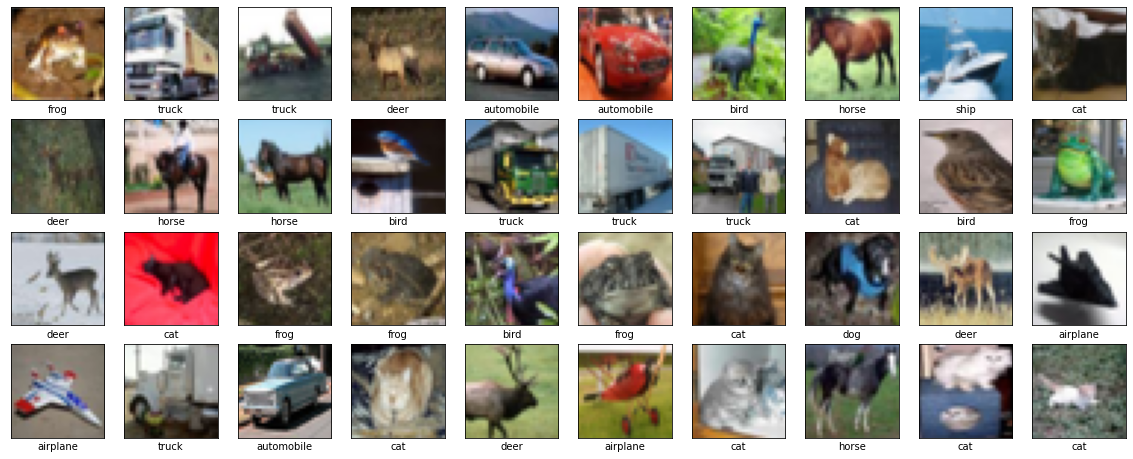

In [6]:
#Preview 40 image from the TRAIN Data

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
i=0
plt.figure(figsize=(20,10))
for i in range(40):
    plt.subplot(5,10,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classes[Y_train[i][0]])

plt.show()

In [7]:
# reshape  2 d to 1 d 
Y_train = Y_train.reshape(-1,)
Y_test = Y_test.reshape(-1,)

# normalization
X_train=X_train/255
X_test=X_test/255

print(f"Shape of x_train: {X_train.shape}")
print(f"Shape of y_train: {Y_train.shape}")


Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000,)


In [42]:
#defining the model...
model = keras.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(2000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_4 (Dense)             (None, 2000)              6002000   
                                                                 
 dense_5 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_6 (Dense)             (None, 10)                10010     
                                                                 
Total params: 17,232,010
Trainable params: 17,232,010
Non-trainable params: 0
_________________________________________________________________


In [43]:
#compiling the model...
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
#training data to the model...
h = model.fit(x=X_train, y=Y_train, epochs=35, validation_split=0.2, batch_size=32)

Epoch 1/35
1250/1250 [==============================] - 83s 66ms/step - loss: 1.9426 - accuracy: 0.3022 - val_loss: 1.8160 - val_accuracy: 0.3390
Epoch 2/35
1250/1250 [==============================] - 82s 66ms/step - loss: 1.7273 - accuracy: 0.3787 - val_loss: 1.6897 - val_accuracy: 0.3843
Epoch 3/35
1250/1250 [==============================] - 82s 66ms/step - loss: 1.6462 - accuracy: 0.4062 - val_loss: 1.6528 - val_accuracy: 0.4154
Epoch 4/35
1250/1250 [==============================] - 82s 65ms/step - loss: 1.5878 - accuracy: 0.4281 - val_loss: 1.6099 - val_accuracy: 0.4282
Epoch 5/35
1250/1250 [==============================] - 82s 66ms/step - loss: 1.5442 - accuracy: 0.4425 - val_loss: 1.6246 - val_accuracy: 0.4168
Epoch 6/35
1250/1250 [==============================] - 84s 67ms/step - loss: 1.5049 - accuracy: 0.4559 - val_loss: 1.5652 - val_accuracy: 0.4408
Epoch 7/35
1250/1250 [==============================] - 83s 67ms/step - loss: 1.4690 - accuracy: 0.4695 - val_loss: 1.5476 -

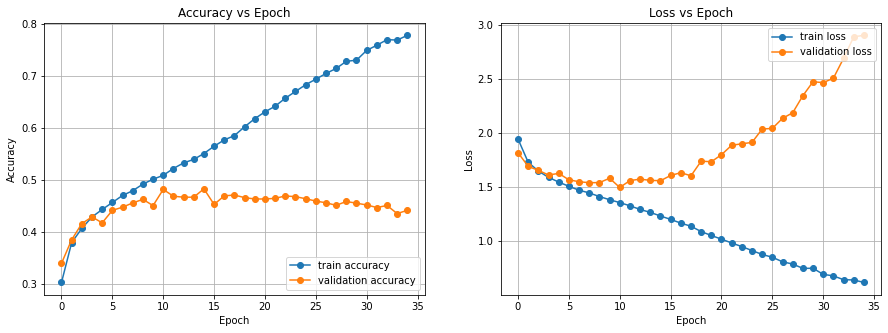

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [48]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(X_test,Y_test)
print('---------------------------')
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)
print('---------------------------')

313/313 [==============================] - 3s 8ms/step - loss: 2.8004 - accuracy: 0.4492
---------------------------
Test Accuracy: 0.44920000433921814
Test Loss: 2.800442695617676
---------------------------


In [49]:
#predicting the data...
predictions=model.predict(X_test[:10])
print(np.argmax(predictions, axis=1))

[4 1 0 0 4 6 2 6 3 1]


In [50]:
# Check our predictions against the ground truths.
print(Y_test[:10])

[3 8 8 0 6 6 1 6 3 1]


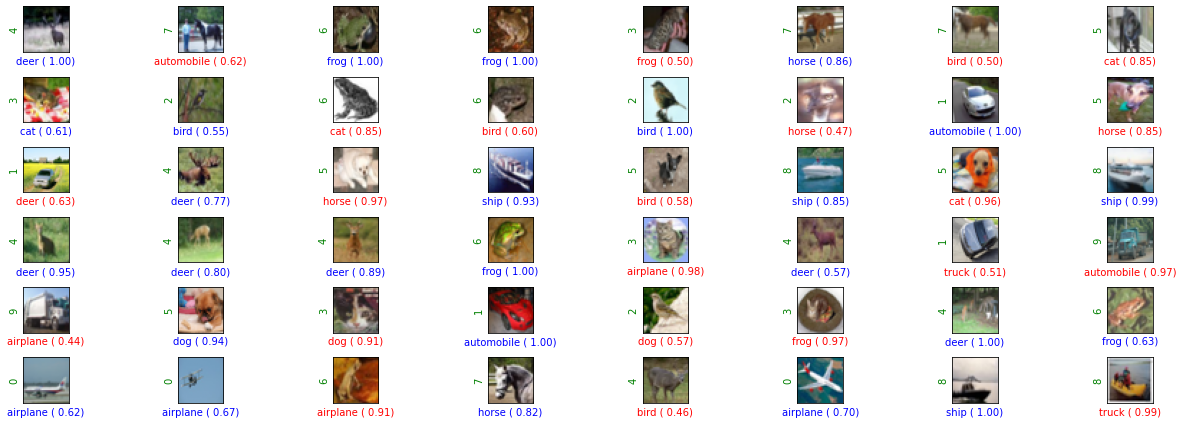

In [58]:
ROWS = 6
COLS = 8

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(18,6))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(32,32,3), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{classes[prediction]} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{classes[prediction]} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()